In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from autoimpute.imputations import SingleImputer,MultipleImputer
from autoimpute.imputations.series import MultinomialLogisticImputer

In [67]:
data = pd.read_csv("mushroom.csv")

In [68]:
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'w','w','p','w','o','e','n','a','g','e'


Data Description: This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [69]:
data['class'].unique()

array(["'p'", "'e'"], dtype=object)

In [70]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,'x','y','n','f','n','f','c','b','b','t',...,'w','w','p','w','o','p','w','v','d','e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [71]:
data.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [72]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())    

stalk-root 2480


In [73]:
data["stalk-root"] =data["stalk-root"].replace('?',np.nan)  

In [74]:
data.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [75]:
for column in data.columns:
    print(column,data[column].nunique())    

cap-shape 6
cap-surface 4
cap-color 10
bruises%3F 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7
class 2


Notice that "veil-type" column has only one unique category. This column won't give much information ,so let's drop it.

In [76]:
data = data.drop(['veil-type'],axis=1)

In [77]:
impute = SingleImputer(strategy='categorical')

In [78]:
impute.fit(data)

SingleImputer(strategy='categorical')

In [79]:
new_data =impute.transform(data)

In [80]:
new_data

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'s','w','w','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'s','w','w','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'s','w','w','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'s','w','w','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'s','w','w','w','o','e','n','a','g','e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,'k','s','n','f','n','a','c','b','y','e',...,'s','o','o','o','o','p','b','c','l','e'
8120,'x','s','n','f','n','a','c','b','y','e',...,'s','o','o','n','o','p','b','v','l','e'
8121,'f','s','n','f','n','a','c','b','n','e',...,'s','o','o','o','o','p','b','c','l','e'
8122,'k','y','n','f','y','f','c','n','b','t',...,'k','w','w','w','o','e','w','v','l','p'


In [81]:
number = new_data["stalk-root"].value_counts()

<BarContainer object of 4 artists>

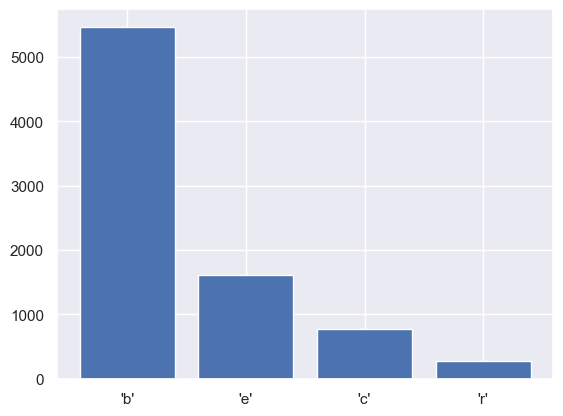

In [82]:
import matplotlib.pyplot as plt
plt.bar(number.index, number.values)

In [83]:
for column in new_data.columns:
    print(column, new_data[column].nunique())

cap-shape 6
cap-surface 4
cap-color 10
bruises%3F 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7
class 2


In [84]:
new_data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'s','w','w','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'s','w','w','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'s','w','w','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'s','w','w','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'s','w','w','w','o','e','n','a','g','e'


In [85]:
new_data['class'] = new_data['class'].replace({"'p'":0, "'e'":1})

In [86]:
new_data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'s','w','w','w','o','p','k','s','u',0
1,'x','s','y','t','a','f','c','b','k','e',...,'s','w','w','w','o','p','n','n','g',1
2,'b','s','w','t','l','f','c','b','n','e',...,'s','w','w','w','o','p','n','n','m',1
3,'x','y','w','t','p','f','c','n','n','e',...,'s','w','w','w','o','p','k','s','u',0
4,'x','s','g','f','n','f','w','b','k','t',...,'s','w','w','w','o','e','n','a','g',1


In [87]:
new_data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [88]:
y = new_data['class']

In [89]:
column_list = ['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

In [90]:
for column in column_list:
    new_data = pd.get_dummies(new_data, columns=[column], drop_first=True)

In [91]:
new_data.head()

,class,cap-shape_'c',cap-shape_'f',cap-shape_'k',cap-shape_'s',cap-shape_'x',cap-surface_'g',cap-surface_'s',cap-surface_'y',cap-color_'c',...,population_'n',population_'s',population_'v',population_'y',habitat_'g',habitat_'l',habitat_'m',habitat_'p',habitat_'u',habitat_'w'
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
new_data.columns

Index(['class', 'cap-shape_'c'', 'cap-shape_'f'', 'cap-shape_'k'',
       'cap-shape_'s'', 'cap-shape_'x'', 'cap-surface_'g'', 'cap-surface_'s'',
       'cap-surface_'y'', 'cap-color_'c'', 'cap-color_'e'', 'cap-color_'g'',
       'cap-color_'n'', 'cap-color_'p'', 'cap-color_'r'', 'cap-color_'u'',
       'cap-color_'w'', 'cap-color_'y'', 'bruises%3F_'t'', 'odor_'c'',
       'odor_'f'', 'odor_'l'', 'odor_'m'', 'odor_'n'', 'odor_'p'', 'odor_'s'',
       'odor_'y'', 'gill-attachment_'f'', 'gill-spacing_'w'', 'gill-size_'n'',
       'gill-color_'e'', 'gill-color_'g'', 'gill-color_'h'', 'gill-color_'k'',
       'gill-color_'n'', 'gill-color_'o'', 'gill-color_'p'', 'gill-color_'r'',
       'gill-color_'u'', 'gill-color_'w'', 'gill-color_'y'', 'stalk-shape_'t'',
       'stalk-root_'c'', 'stalk-root_'e'', 'stalk-root_'r'',
       'stalk-surface-above-ring_'k'', 'stalk-surface-above-ring_'s'',
       'stalk-surface-above-ring_'y'', 'stalk-surface-below-ring_'k'',
       'stalk-surface-below-ring

In [93]:
len(new_data.columns)

95

In [99]:
y.value_counts()

1    4208
0    3916
Name: class, dtype: int64

In [100]:
type(y)

pandas.core.series.Series

Text(0.5, 1.0, 'Distrubution of classes in dataset')

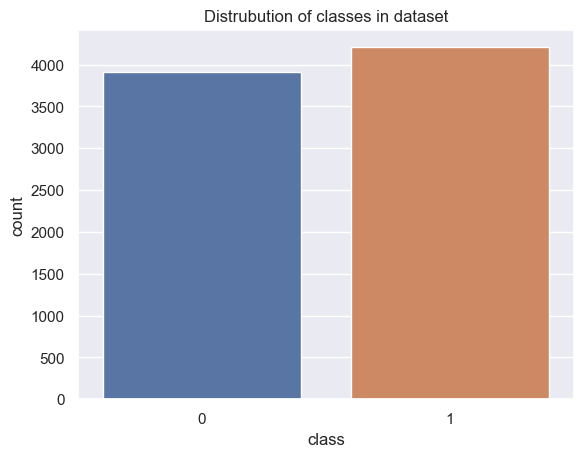

In [102]:
sns.countplot(x=y)
plt.title("Distrubution of classes in dataset")